<a href="https://colab.research.google.com/github/AMRITL-D/learning/blob/master/Assignment2_MSD_13102024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STUDENT ID:  224573809, 224579683 ,224647042
#STUDENT NAME: Amrit Lal, Rahil Annu Naik, Chandrasekaran Manickam


# **Import Libraries & Install Pyspark environment**

In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,595 kB]
Get:14 http://archive.ubuntu.com/ubuntu ja

In [2]:
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

In [3]:
!pip install -q findspark

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [5]:
import findspark
findspark.init()

In [6]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

In [7]:
from pyspark.sql import functions as F

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Read and load data**

In [9]:
link_data='https://github.com/tulip-lab/sit742/raw/develop/Assessment/2024/data/transactionrecord.gz'

In [10]:
!wget -O transactionrecord.gz $link_data

--2024-10-13 05:38:38--  https://github.com/tulip-lab/sit742/raw/develop/Assessment/2024/data/transactionrecord.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tulip-lab/sit742/develop/Assessment/2024/data/transactionrecord.gz [following]
--2024-10-13 05:38:38--  https://raw.githubusercontent.com/tulip-lab/sit742/develop/Assessment/2024/data/transactionrecord.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6986544 (6.7M) [application/octet-stream]
Saving to: ‘transactionrecord.gz’

transactionrecord.g 100%[===================>]   6.66M  --.-KB/s    in 0.07s   

2024-10-13 05:38:39 (97.3 MB

In [11]:
from pyspark.sql import SQLContext

sqlContext = SQLContext(spark)
sqlContext

In [12]:
df_original = sqlContext.read.format('csv') \
    .option('header', 'true') \
    .option('inferSchema', 'true') \
    .load('transactionrecord.gz')

In [13]:
df_original.show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23239|Set Of 4 Knick Kn...|             0ca|11.94|       6|     13069|United Kingdom|
|       581475|12/9/2019|    21705|Bag 500g Swirly M...|             0ca|10.65| 

# **Part I**

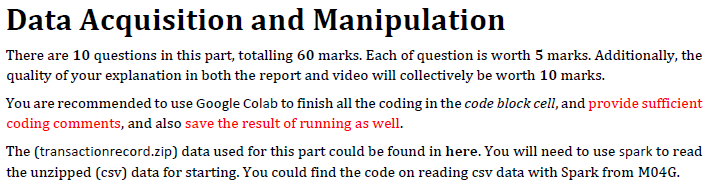

## **Question-1.1**

image.png

### **Question 1.1.1**

image.png

In [14]:
df_CustNo_null = df_original.filter(df_original.CustomerNo.isNull())
df_CustNo_null.show()

+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Product_category|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+



In [15]:
df_CustNo_NA = df_original.filter(df_original.CustomerNo == "NA")
df_CustNo_NA.show()

+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Product_category|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+



In [16]:
df_CustNo_minusOne = df_original.filter(df_original.CustomerNo == "-1")
df_CustNo_minusOne.show()

+-------------+----------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|      Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+----------+---------+--------------------+----------------+-----+--------+----------+--------------+
|      C581406| 12/8/2019|   46000M|Polyester Filler ...|             0ca| 6.19|    -240|        -1|United Kingdom|
|      C581406| 12/8/2019|   46000S|Polyester Filler ...|             0ca| 6.19|    -300|        -1|United Kingdom|
|      C575153| 11/8/2019|    22947|Wooden Advent Cal...|             0ca|44.25|      -1|        -1|United Kingdom|
|      C574288| 11/3/2019|    22178|Victorian Glass H...|             0ca|25.37|      -1|        -1|United Kingdom|
|      C573180|10/28/2019|    23048|Set Of 10 Lantern...|             0ca| 14.5|      -1|        -1|United Kingdom|
|      C569495| 10/4/2019|    21843|Red Retrospot Cak...|             0c

**Though there is no null values, no 'NA' values and already having '-1' values, just to understand how to change 'NA' values to '-1', following code is given.**

In [17]:
# Replace 'NA' with '-1' in CustomerNo column
df_1 = df_original.na.replace("NA", "-1", subset=["CustomerNo"])

In [18]:
df_1.show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23239|Set Of 4 Knick Kn...|             0ca|11.94|       6|     13069|United Kingdom|
|       581475|12/9/2019|    21705|Bag 500g Swirly M...|             0ca|10.65| 

### **Question 1.1.2**

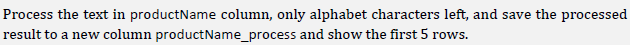

In [19]:
# Process the text in productName column to keep only alphabet characters
df_1 = df_1.withColumn("productName_process", regexp_replace("productName", "[^a-zA-Z ]", ""))
df_1 = df_1.withColumn("productName_process", regexp_replace("productName_process", "  ", " "))
df_1.show(5)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of Wooden Mar...|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|Tree TLight Holde...|
|       581475|12/9/2019|    23239|Set Of 4 Knic

## **Question 1.2**

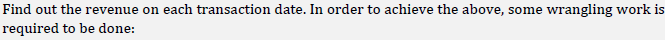

### **Question 1.2.1**

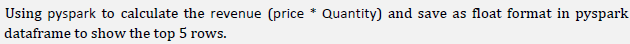

In [20]:
# Calculate revenue and save as float format
df_1 = df_1.withColumn("revenue", (col("Price") * col("Quantity")).cast("float"))
df_1.show(5)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|revenue|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of Wooden Mar...| 257.64|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|  383.4|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...| 138.36|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|Tree TLight Holde...| 

### **Question 1.2.2**

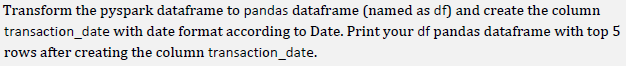

In [21]:
# Convert to pandas DataFrame
df_pd = df_1.toPandas()


# Create transaction_date column with date format
df_pd['transaction_date'] = pd.to_datetime(df_pd['Date'])

df_pd.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,revenue,transaction_date
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree TLight Holder Willie Winkie,127.800003,2019-12-09
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09


In [22]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   TransactionNo        536350 non-null  object        
 1   Date                 536350 non-null  object        
 2   ProductNo            536350 non-null  object        
 3   ProductName          536350 non-null  object        
 4   Product_category     536350 non-null  object        
 5   Price                536350 non-null  float64       
 6   Quantity             536350 non-null  int32         
 7   CustomerNo           536350 non-null  int32         
 8   Country              536350 non-null  object        
 9   productName_process  536350 non-null  object        
 10  revenue              536350 non-null  float32       
 11  transaction_date     536350 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), object(7)
memory

### **Question 1.2.3**

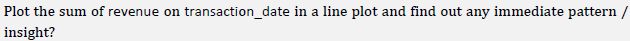

In [23]:
total_revenue_per_day = df_pd.groupby('transaction_date')['revenue'].sum().reset_index()

total_revenue_per_day.head()

,transaction_date,revenue
0,2018-12-01,324649.218750
1,2018-12-02,260301.656250
2,2018-12-03,201975.187500
3,2018-12-05,196630.796875
4,2018-12-06,270656.875000


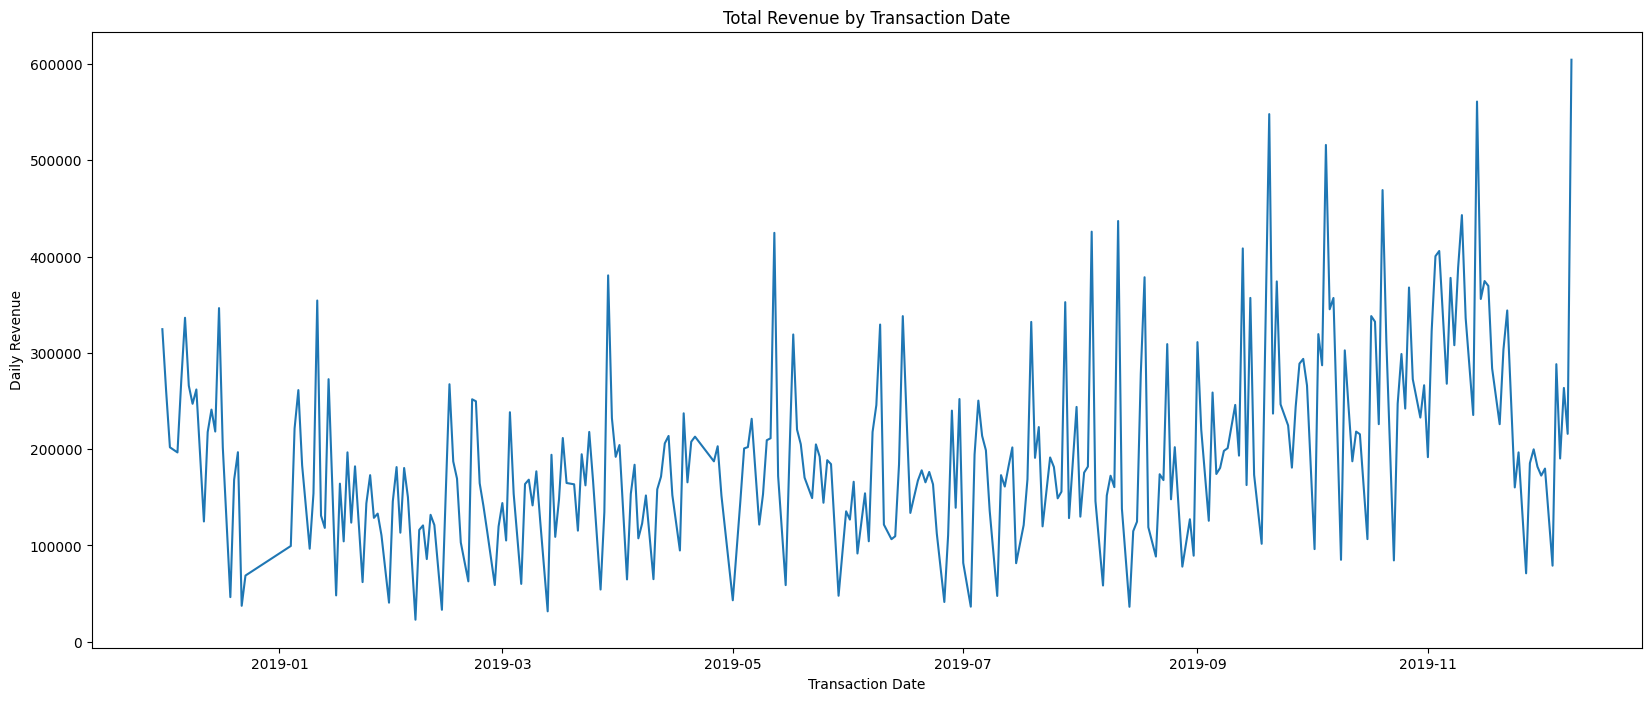

In [24]:
# Plot the data
plt.figure(figsize=(20, 8))
plt.plot(total_revenue_per_day['transaction_date'], total_revenue_per_day['revenue'])
plt.title('Total Revenue by Transaction Date')
plt.xlabel('Transaction Date')
plt.ylabel('Daily Revenue')
plt.show()

## **Question 1.3**

image.png

### **Question 1.3.1**

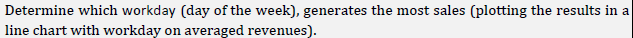

### **Date column and Week_day column added using pyspark**

In [25]:
df_1.dtypes

[('TransactionNo', 'string'),
 ('Date', 'string'),
 ('ProductNo', 'string'),
 ('ProductName', 'string'),
 ('Product_category', 'string'),
 ('Price', 'double'),
 ('Quantity', 'int'),
 ('CustomerNo', 'int'),
 ('Country', 'string'),
 ('productName_process', 'string'),
 ('revenue', 'float')]

In [26]:
df_1 = df_1.withColumn("date_formatted", to_date(col("Date"), "MM/d/yyyy"))

In [27]:
df_1.dtypes

[('TransactionNo', 'string'),
 ('Date', 'string'),
 ('ProductNo', 'string'),
 ('ProductName', 'string'),
 ('Product_category', 'string'),
 ('Price', 'double'),
 ('Quantity', 'int'),
 ('CustomerNo', 'int'),
 ('Country', 'string'),
 ('productName_process', 'string'),
 ('revenue', 'float'),
 ('date_formatted', 'date')]

In [28]:
df_1.show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|revenue|date_formatted|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of Wooden Mar...| 257.64|    2019-12-09|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|  383.4|    2019-12-09|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...| 138.36|    2019-12-09|
|       581475|12/9/2019|    23272|Tree T-Ligh

In [29]:
df_1 = df_1.withColumn('day_name', F.date_format('date_formatted', 'EEEE'))

# Show the updated DataFrame
df_1.show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+--------------+--------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|revenue|date_formatted|day_name|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+--------------+--------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of Wooden Mar...| 257.64|    2019-12-09|  Monday|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|  383.4|    2019-12-09|  Monday|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...| 138.36|    2019-12-09|  

###**With Pandas**

In [30]:
df_pd.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,revenue,transaction_date
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree TLight Holder Willie Winkie,127.800003,2019-12-09
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09


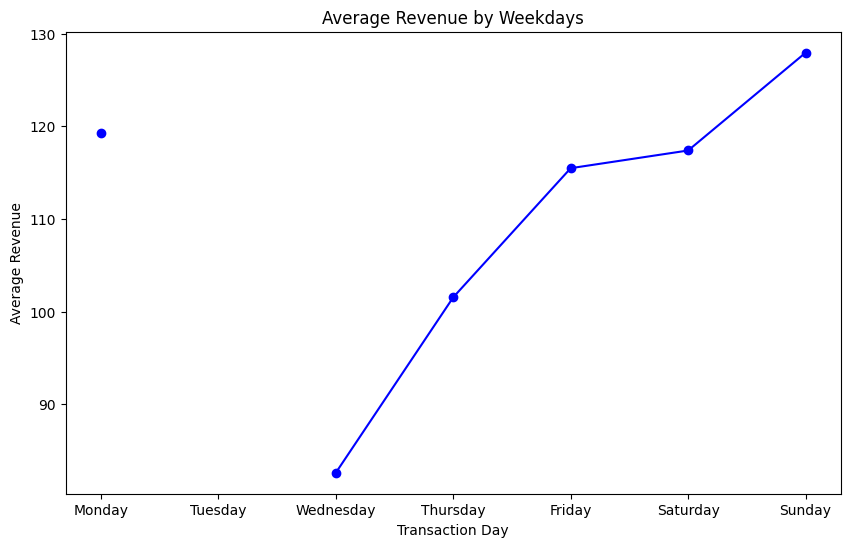

In [31]:
df_pd['day_of_week'] = df_pd['transaction_date'].dt.day_name()

# Group by 'day_of_week' and calculate the average revenue
avg_revenue_by_day = df_pd.groupby('day_of_week')['revenue'].mean()

# Ensure the days of the week are in the correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_revenue_by_day = avg_revenue_by_day.reindex(day_order)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(avg_revenue_by_day.index, avg_revenue_by_day.values, marker='o', linestyle='-', color='b')
plt.title('Average Revenue by Weekdays')
plt.xlabel('Transaction Day')
plt.ylabel('Average Revenue')
plt.show()

In [32]:
avg_revenue_by_day

,revenue
day_of_week,
Monday,119.241638
Tuesday,NaN
Wednesday,82.594635
Thursday,101.541534
Friday,115.479759
Saturday,117.389496
Sunday,127.947586


**Sunday's Average revenue stands high**ₙ



**Tuesday no revenue indicates it's holiday and no shopping**

### **With pyspark**

In [33]:
from pyspark.sql.functions import avg

# Set the legacy time parser policy to handle the date format issue
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

In [34]:
avg_revenue_by_weekday = df_1.groupBy("day_name").agg(avg("revenue").alias("avg_revenue"))
avg_revenue_by_weekday.show()

+---------+------------------+
| day_name|       avg_revenue|
+---------+------------------+
|Wednesday| 82.59463110371803|
|   Friday|115.47976051571708|
| Thursday|101.54153157904337|
| Saturday|117.38949377439889|
|   Monday|119.24163892295012|
|   Sunday|127.94758752879004|
+---------+------------------+



### **Question 1.3.2**

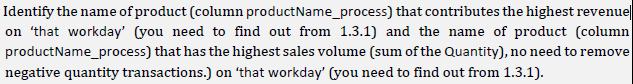

### **With Pandas**

In [35]:
sunday_df = df_pd[df_pd['day_of_week'] == "Sunday"]

grouped_df = sunday_df.groupby('productName_process')['revenue'].sum().sort_values(ascending=False)
grouped_df.head(10)

,revenue
productName_process,
World War Gliders Asstd Designs,187081.343750
Assorted Colour Bird Ornament,132705.609375
Popcorn Holder,117119.632812
Cream Hanging Heart TLight Holder,108240.867188
Mini Paint Set Vintage,100676.757812
Red Harmonica In Box,86943.320312
Pack Of Retrospot Cake Cases,85156.648438
Regency Cakestand Tier,72923.210938
Assorted Colours Silk Fan,72628.328125


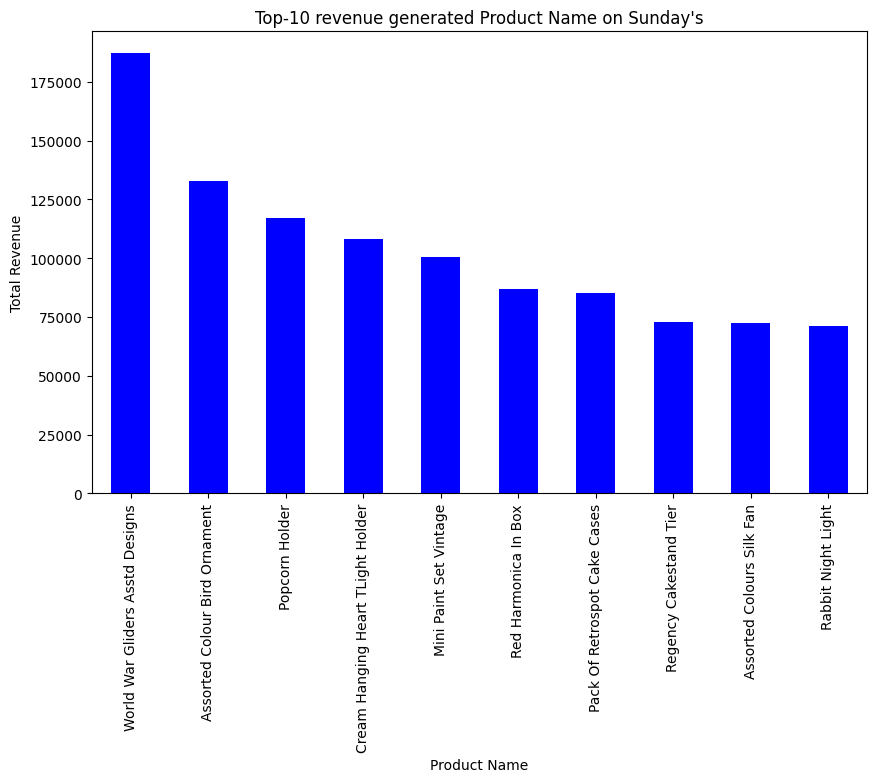

In [36]:
# Plot the results
plt.figure(figsize=(10, 6))
grouped_df.head(10).plot(kind='bar', color='b')
plt.title("Top-10 revenue generated Product Name on Sunday's")
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.show()

In [37]:
grouped_df_vol = sunday_df.groupby('productName_process')['Quantity'].sum().sort_values(ascending=False)
grouped_df_vol.head(10)

,Quantity
productName_process,
World War Gliders Asstd Designs,18051
Popcorn Holder,12232
Assorted Colour Bird Ornament,11409
Jumbo Bag Red Retrospot,11283
Mini Paint Set Vintage,9348
Cream Hanging Heart TLight Holder,8342
Pack Of Retrospot Cake Cases,7960
Red Harmonica In Box,7634
Assorted Colours Silk Fan,6639


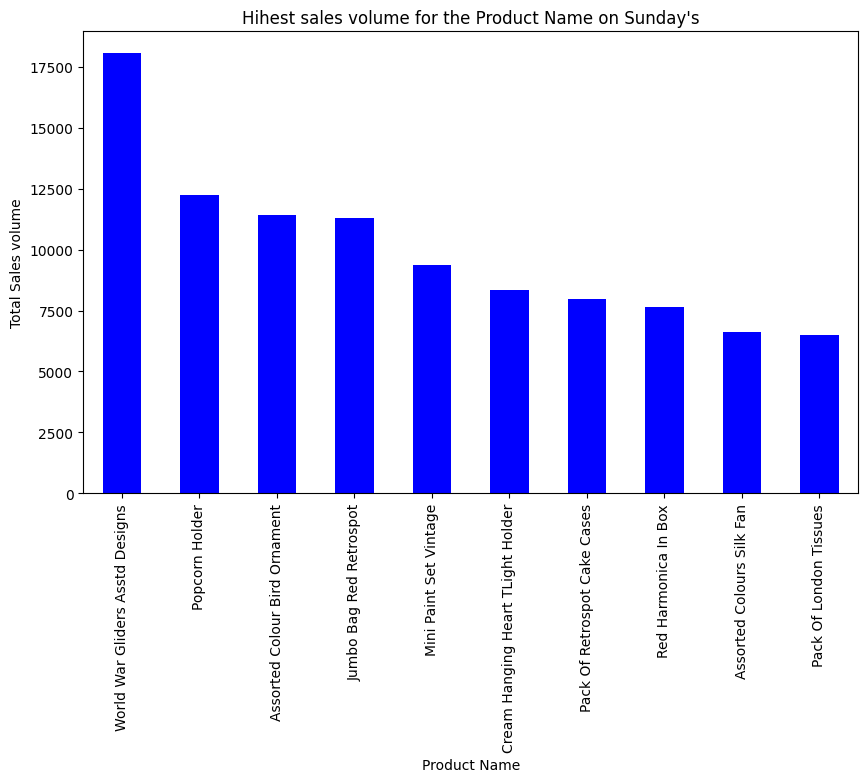

In [38]:
# Plot the results
plt.figure(figsize=(10, 6))
grouped_df_vol.head(10).plot(kind='bar', color='b')
plt.title("Hihest sales volume for the Product Name on Sunday's")
plt.xlabel('Product Name')
plt.ylabel('Total Sales volume')
plt.show()

### **With pyspark**

In [39]:
df_sunday = df_1.filter(col("day_name") == "Sunday")

revenue_sunday = df_sunday.groupBy("productName_process").agg(sum("revenue").alias("total_revenue")).orderBy("total_revenue", ascending=False)
revenue_sunday.show(10)

+--------------------+------------------+
| productName_process|     total_revenue|
+--------------------+------------------+
|World War Gliders...| 187081.3498363495|
|Assorted Colour B...| 132705.6082162857|
|      Popcorn Holder|117119.63029241562|
|Cream Hanging Hea...|108240.87021780014|
|Mini Paint Set Vi...|100676.75958251953|
|Red Harmonica In Box| 86943.32003116608|
|Pack Of Retrospot...| 85156.64984512329|
|Regency Cakestand...| 72923.20888853073|
|Assorted Colours ...|  72628.3298406601|
|  Rabbit Night Light| 71365.69045162201|
+--------------------+------------------+
only showing top 10 rows



In [40]:
volume_sunday = df_sunday.groupBy("productName_process").agg(sum("Quantity").alias("total_quantity")).orderBy("total_quantity", ascending=False)
volume_sunday.show(10)

+--------------------+--------------+
| productName_process|total_quantity|
+--------------------+--------------+
|World War Gliders...|         18051|
|      Popcorn Holder|         12232|
|Assorted Colour B...|         11409|
|Jumbo Bag Red Ret...|         11283|
|Mini Paint Set Vi...|          9348|
|Cream Hanging Hea...|          8342|
|Pack Of Retrospot...|          7960|
|Red Harmonica In Box|          7634|
|Assorted Colours ...|          6639|
|Pack Of London Ti...|          6478|
+--------------------+--------------+
only showing top 10 rows



### **Question 1.3.3**

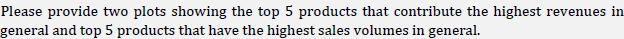

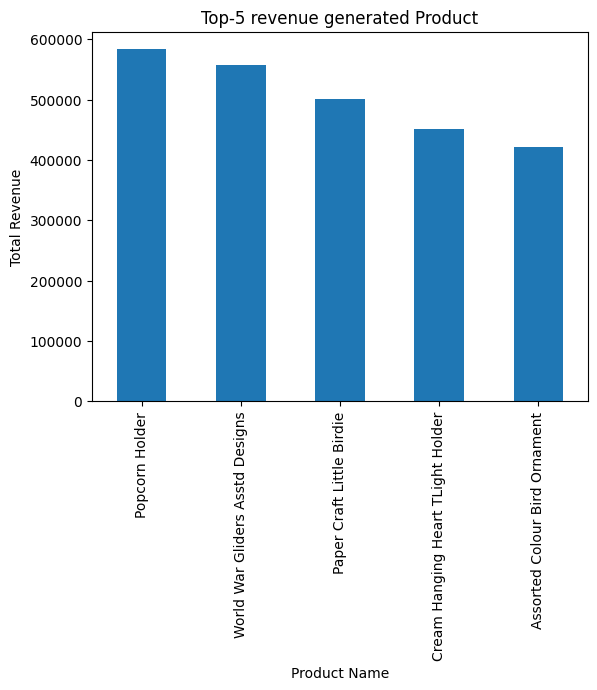

In [41]:
# Group by 'Product' and calculate the revenue
revenue_by_product = df_pd.groupby('productName_process')['revenue'].sum().sort_values(ascending=False)

revenue_by_product.head(5).plot(kind='bar')
plt.title("Top-5 revenue generated Product")
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.show()

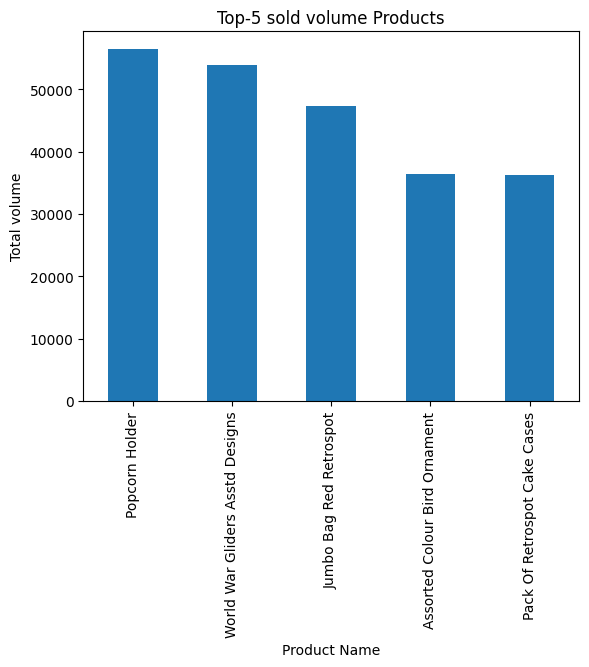

In [42]:
# Group by 'Product' and calculate the sales volume
vol_by_product = df_pd.groupby('productName_process')['Quantity'].sum().sort_values(ascending=False)

vol_by_product.head(5).plot(kind='bar')
plt.title("Top-5 sold volume Products")
plt.xlabel('Product Name')
plt.ylabel('Total volume')
plt.show()

## **Question 1.4**

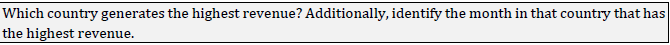

### **With Pandas**

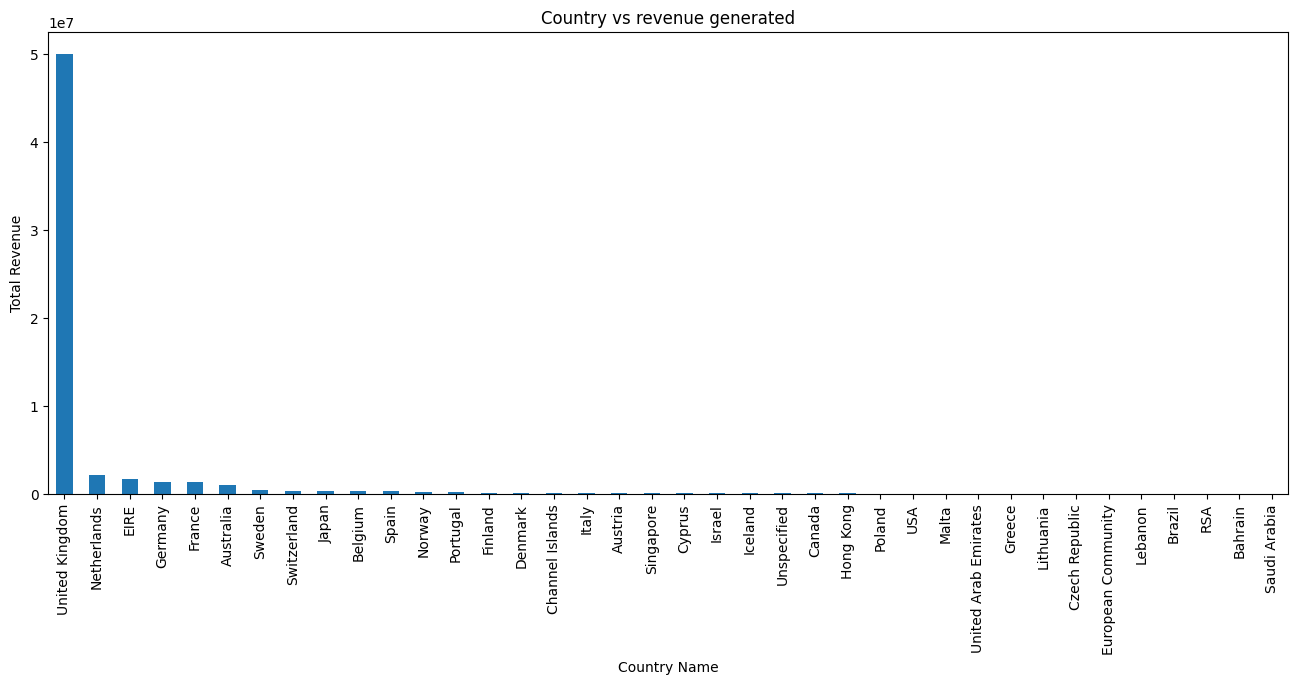

In [43]:
# Group by 'County' and calculate the revenue
revenue_by_country = df_pd.groupby('Country')['revenue'].sum().sort_values(ascending=False)

revenue_by_country.plot(kind='bar', figsize=(16,6))
plt.title("Country vs revenue generated")
plt.xlabel('Country Name')
plt.ylabel('Total Revenue')
plt.show()

In [44]:
#create the Month number from transection_date
df_pd['month'] = df_pd['transaction_date'].dt.month_name()

In [45]:
UK_df = df_pd[df_pd['Country'] == "United Kingdom"]

UK_revenue_df = UK_df.groupby('month')['revenue'].sum().sort_values(ascending=False)
# Ensure the days of the week are in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
UK_revenue_df = UK_revenue_df.reindex(month_order)

UK_revenue_df.head(12)

,revenue
month,
January,2766521.50
February,2704022.25
March,3537493.00
April,3053768.50
May,3689507.50
June,3500065.75
July,3765558.00
August,3667938.50
September,5480320.50


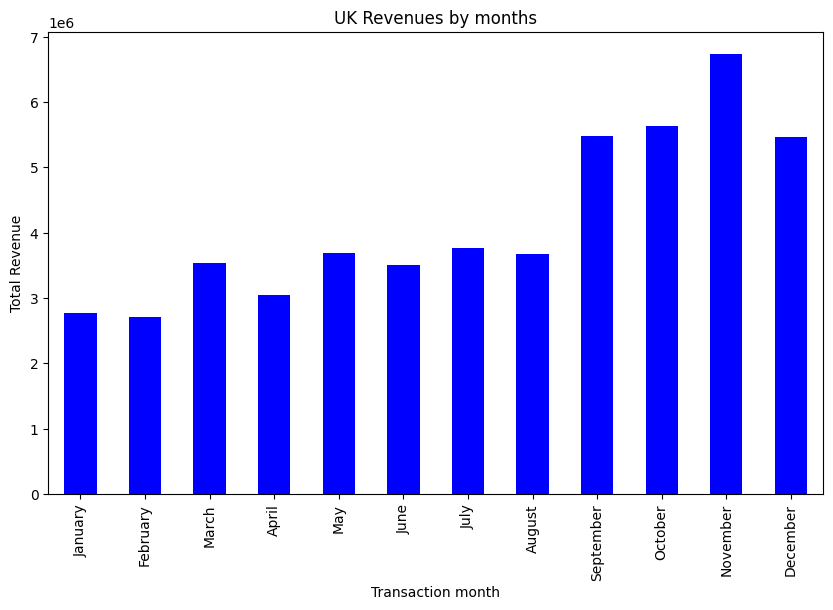

In [46]:
# Plot the results
plt.figure(figsize=(10, 6))
UK_revenue_df.plot(kind='bar', color='b')
plt.title('UK Revenues by months')
plt.xlabel('Transaction month')
plt.ylabel('Total Revenue')
plt.show()

**November month UK recorded highest Revenue**

### **With pyspark**

In [47]:
from pyspark.sql.functions import month

df_1 = df_1.withColumn('month', month(df_1['date_formatted']))
df_1.show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+--------------+--------+-----+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|revenue|date_formatted|day_name|month|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+--------------+--------+-----+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of Wooden Mar...| 257.64|    2019-12-09|  Monday|   12|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|  383.4|    2019-12-09|  Monday|   12|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vint

In [48]:
revenue_country = df_1.groupBy("Country").agg(sum("revenue").alias("total_revenue")).orderBy("total_revenue", ascending=False)
revenue_country.show(10)

+--------------+--------------------+
|       Country|       total_revenue|
+--------------+--------------------+
|United Kingdom|4.9994030344613075E7|
|   Netherlands|   2147811.400727272|
|          EIRE|  1660645.0757994652|
|       Germany|  1350265.4045658112|
|        France|  1316880.9862494469|
|     Australia|   988756.3554086685|
|        Sweden|   396042.6067504883|
|   Switzerland|   358423.6121869087|
|         Japan|  283293.47243356705|
|       Belgium|   271346.9812273979|
+--------------+--------------------+
only showing top 10 rows



In [49]:
df_UK = df_1.filter(col("Country") == "United Kingdom")

revenue_UK = df_UK.groupBy("month").agg(sum("revenue").alias("total_revenue")).orderBy("total_revenue", ascending=False)
revenue_UK.show(10)

+-----+------------------+
|month|     total_revenue|
+-----+------------------+
|   11|  6737639.98568058|
|   10| 5632406.450119495|
|    9| 5480320.703197956|
|   12| 5458788.086450577|
|    7|3765557.9898142815|
|    5|3689507.6040911674|
|    8| 3667938.424147129|
|    3| 3537492.916624546|
|    6|3500065.7788448334|
|    4|3053768.6136493683|
+-----+------------------+
only showing top 10 rows



## **Question 1.5**

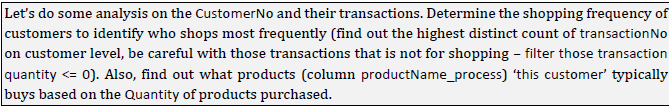

### **With Pandas**

In [50]:
#step1 filter the transcetion having vlue more than 0
filter_df=df_pd[df_pd['Quantity']>0]

In [51]:
customer_frequency = filter_df.groupby('CustomerNo')['TransactionNo'].nunique().rename('transaction_count').sort_values(ascending=False)
customer_frequency

,transaction_count
CustomerNo,
12748,207
14911,198
17841,125
13089,98
15311,91
...,...
12080,1
12081,1
12082,1


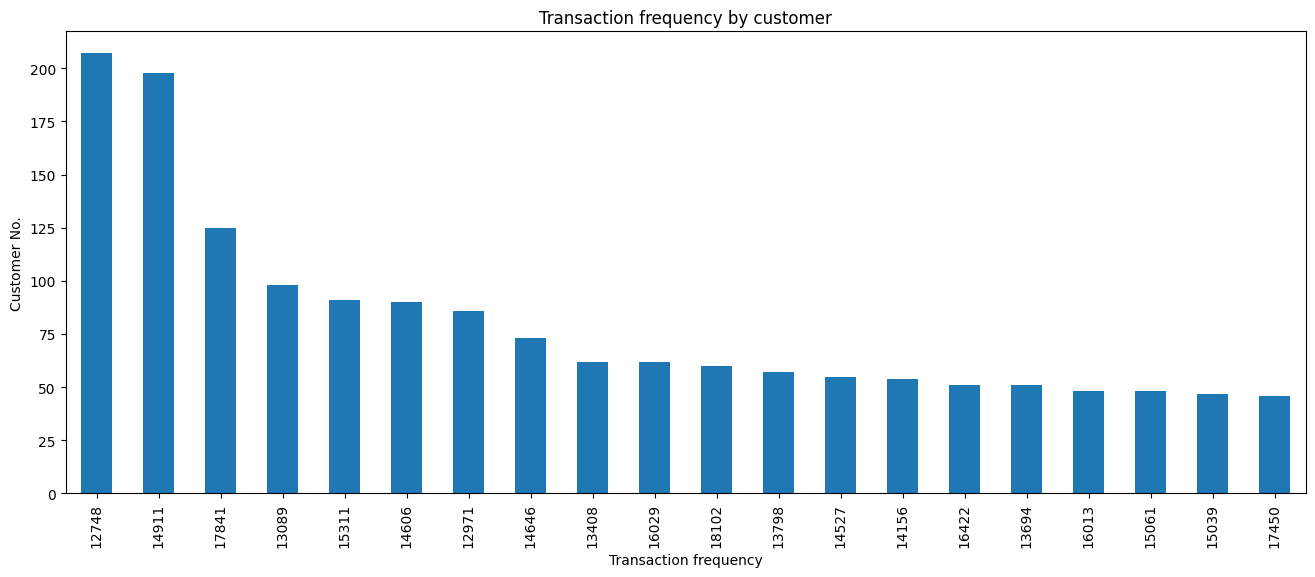

In [52]:
customer_frequency.head(20).plot(kind='bar', figsize=(16,6))
plt.title("Transaction frequency by customer")
plt.xlabel('Transaction frequency')
plt.ylabel('Customer No.')
plt.show()

In [53]:
cust_12748 = filter_df[filter_df['CustomerNo'] == 12748]
cust_12748.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,revenue,transaction_date,day_of_week,month
1540,581580,12/9/2019,23334,Ivory Wicker Heart Small,0ca,7.24,4,12748,United Kingdom,Ivory Wicker Heart Small,28.959999,2019-12-09,Monday,December
1541,581580,12/9/2019,21790,Vintage Snap Cards,0ca,7.24,1,12748,United Kingdom,Vintage Snap Cards,7.240000,2019-12-09,Monday,December
1542,581580,12/9/2019,84993A,75 Green Petit Four Cases,0ca,7.24,2,12748,United Kingdom,Green Petit Four Cases,14.480000,2019-12-09,Monday,December
1543,581580,12/9/2019,22906,12 Message Cards With Envelopes,0ca,7.24,1,12748,United Kingdom,Message Cards With Envelopes,7.240000,2019-12-09,Monday,December
1544,581580,12/9/2019,21803,Christmas Tree Star Decoration,0ca,7.24,2,12748,United Kingdom,Christmas Tree Star Decoration,14.480000,2019-12-09,Monday,December


In [54]:
df_12748_qty = cust_12748.groupby('productName_process')['Quantity'].sum().sort_values(ascending=False)
df_12748_qty.head()

,Quantity
productName_process,
Victorian Metal Postcard Spring,595
World War Gliders Asstd Designs,480
Rose Scent Candle Jewelled Drawer,408
Cartoon Pencil Sharpeners,405
Small White Retrospot Mug In Box,390


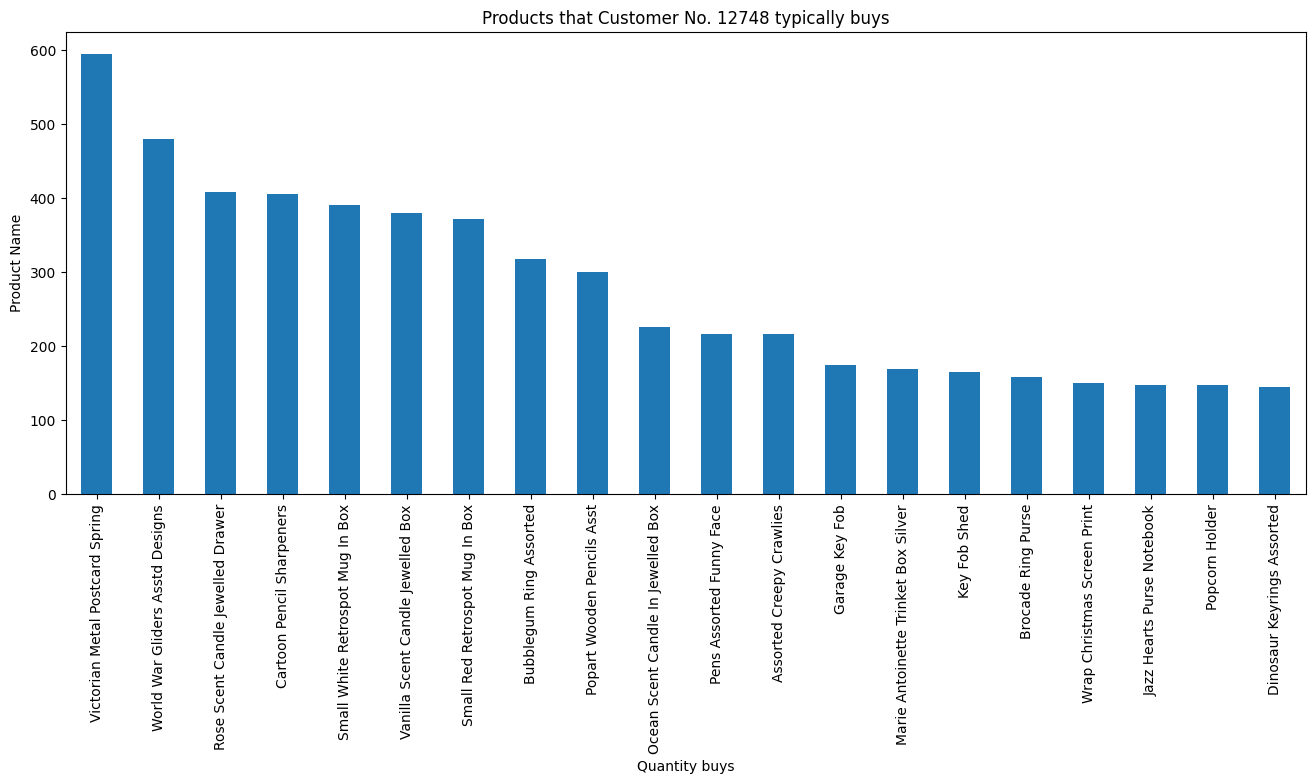

In [55]:
df_12748_qty.head(20).plot(kind='bar', figsize=(16,6))
plt.title("Products that Customer No. 12748 typically buys")
plt.xlabel('Quantity buys')
plt.ylabel('Product Name')
plt.show()

### **With pyspark**

In [56]:
df_1.count()

536350

In [57]:
df_1.filter(df_1['Quantity'] <= 0).count()

8585

In [58]:
df_1.filter(df_1['Quantity'] > 0).count()

527765

In [59]:
df_1_qty_filtered = df_1.filter(df_1['Quantity'] > 0)

df_1_qty_filtered.count()

527765

In [60]:
transaction_df = df_1_qty_filtered.groupBy("CustomerNo").agg(countDistinct("TransactionNo").alias("Transaction_count")).sort(desc("Transaction_count"))
transaction_df.show()

+----------+-----------------+
|CustomerNo|Transaction_count|
+----------+-----------------+
|     12748|              207|
|     14911|              198|
|     17841|              125|
|     13089|               98|
|     15311|               91|
|     14606|               90|
|     12971|               86|
|     14646|               73|
|     13408|               62|
|     16029|               62|
|     18102|               60|
|     13798|               57|
|     14527|               55|
|     14156|               54|
|     16422|               51|
|     13694|               51|
|     16013|               48|
|     15061|               48|
|     15039|               47|
|     17450|               46|
+----------+-----------------+
only showing top 20 rows



In [61]:
productQty_df = df_1_qty_filtered.filter(col("CustomerNo") == 12748).groupBy("CustomerNo", "productName_process").agg(sum("Quantity").alias("Total_Quantity")).sort(desc("Total_Quantity"))
productQty_df.show()

+----------+--------------------+--------------+
|CustomerNo| productName_process|Total_Quantity|
+----------+--------------------+--------------+
|     12748|Victorian Metal P...|           595|
|     12748|World War Gliders...|           480|
|     12748|Rose Scent Candle...|           408|
|     12748|Cartoon Pencil Sh...|           405|
|     12748|Small White Retro...|           390|
|     12748|Vanilla Scent Can...|           380|
|     12748|Small Red Retrosp...|           372|
|     12748|Bubblegum Ring As...|           318|
|     12748|Popart Wooden Pen...|           300|
|     12748|Ocean Scent Candl...|           225|
|     12748|Assorted Creepy C...|           216|
|     12748|Pens Assorted Fun...|           216|
|     12748|      Garage Key Fob|           174|
|     12748|Marie Antoinette ...|           168|
|     12748|        Key Fob Shed|           164|
|     12748|  Brocade Ring Purse|           158|
|     12748|Wrap Christmas Sc...|           150|
|     12748|      Po

## **Question 1.6**

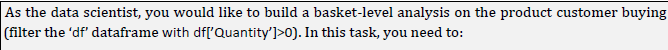

### With Pandas

In [62]:
df_pd.shape

(536350, 14)

In [63]:
# Filter DataFrame where Quantity is greater than 0
filtered_df = df_pd.loc[df_pd['Quantity'] > 0]

In [64]:
filtered_df.shape

(527765, 14)

In [65]:
filtered_df.head(10)

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,revenue,transaction_date,day_of_week,month
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09,Monday,December
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09,Monday,December
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09,Monday,December
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree TLight Holder Willie Winkie,127.800003,2019-12-09,Monday,December
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09,Monday,December
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,0ca,10.65,24,13069,United Kingdom,Bag g Swirly Marbles,255.600006,2019-12-09,Monday,December
6,581475,12/9/2019,22118,Joy Wooden Block Letters,0ca,11.53,18,13069,United Kingdom,Joy Wooden Block Letters,207.539993,2019-12-09,Monday,December
7,581475,12/9/2019,22119,Peace Wooden Block Letters,0ca,12.25,12,13069,United Kingdom,Peace Wooden Block Letters,147.000000,2019-12-09,Monday,December
8,581475,12/9/2019,22217,T-Light Holder Hanging Lace,0ca,10.65,12,13069,United Kingdom,TLight Holder Hanging Lace,127.800003,2019-12-09,Monday,December
9,581475,12/9/2019,22216,T-Light Holder White Lace,0ca,10.55,24,13069,United Kingdom,TLight Holder White Lace,253.199997,2019-12-09,Monday,December


### With PySpark

In [66]:
df_1.show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+--------------+--------+-----+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|revenue|date_formatted|day_name|month|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+--------------+--------+-----+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of Wooden Mar...| 257.64|    2019-12-09|  Monday|   12|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|  383.4|    2019-12-09|  Monday|   12|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vint

In [67]:
df_filtered = df_1.filter(df_1['Quantity'] > 0)
df_filtered.show()

df_master = df_1

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+--------------+--------+-----+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|revenue|date_formatted|day_name|month|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+--------------+--------+-----+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of Wooden Mar...| 257.64|    2019-12-09|  Monday|   12|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|  383.4|    2019-12-09|  Monday|   12|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vint

### **Question 1.6.1**

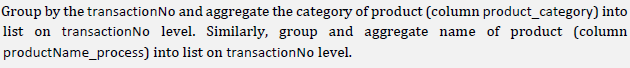

### With Pandas

In [68]:
Trans_summary=filtered_df.groupby('TransactionNo').agg({'Product_category': lambda x: list(x), 'productName_process': lambda x: list(x)})

In [69]:
df_tr = Trans_summary.copy()

In [70]:
df_tr.head()

,Product_category,productName_process
TransactionNo,,
536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[Cream Hanging Heart TLight Holder, White Moro..."
536366,"[0ca, 0ca]","[Hand Warmer Union Jack, Hand Warmer Red Retro..."
536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Assorted Colour Bird Ornament, Poppys Playhou..."
536368,"[0ca, 0ca, 0ca, 0ca]","[Jam Making Set With Jars, Red Coat Rack Paris..."
536369,[0ca],[Bath Building Block Word]


### With PySpark

In [71]:
# Use Spark's built in functions for aggregation

df_1 = df_filtered.groupby('TransactionNo').agg(
    collect_list('Product_category').alias('Product_category'),
    collect_list('productName_process').alias('productName_process'))

df_1.show()


+-------------+--------------------+--------------------+
|TransactionNo|    Product_category| productName_process|
+-------------+--------------------+--------------------+
|       536596|[0ca, 0ca, 0ca, 0...|[Vintage Union Ja...|
|       536938|[0ca, 0ca, 0ca, 0...|[Jumbo Storage Ba...|
|       537252|               [0ca]|    [Popcorn Holder]|
|       537691|[0ca, 0ca, 0ca, 0...|[TLight Glass Flu...|
|       538184|[0ca, 0ca, 0ca, 0...|[Pack Of Birdy Gi...|
|       538517|[0ca, 0ca, 0ca, 1...|[Pack Of Coloured...|
|       538879|[0ca, 0ca, 0ca, 1...|[Danish Rose Roun...|
|       539275|[0ca, 0ca, 0ca, 0...|[Set Of Vintage C...|
|       539630|[0ca, 0ca, 0ca, 0...|[Chick Grey Hot W...|
|       540499|[0ca, 0ca, 0ca, 0...|[Potting Shed Tea...|
|       540540|[0ca, 0ca, 0ca, 0...|[Home Sweet Home ...|
|       540976|[0ca, 0ca, 0ca, 0...|[Paperweight King...|
|       541432|[0ca, 0ca, 0ca, 0ca]|[Retrospot Heart ...|
|       541518|[0ca, 0ca, 0ca, 0...|[Red Retrospot Ta...|
|       541783

### **Question 1.6.2**

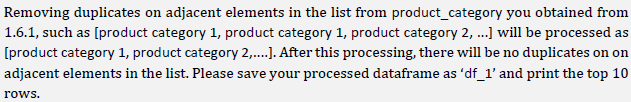

### With Pandas

In [72]:
# Assuming Transectionsummary is your original DataFrame
def remove_adjacent_duplicates(lst):
    """Remove adjacent duplicates from a list."""
    return [x for i, x in enumerate(lst) if i == 0 or x != lst[i - 1]]

# Apply the function to the Product_category column
Trans_summary['Product_category_updated'] = Trans_summary['Product_category'].apply(remove_adjacent_duplicates)
Trans_summary['productName_process_updated'] = Trans_summary['productName_process'].apply(remove_adjacent_duplicates)

In [73]:
# Save the processed DataFrame as df_1
df_1_pd = Trans_summary.copy()
df_1_pd.head(10)

,Product_category,productName_process,Product_category_updated,productName_process_updated
TransactionNo,,,,
536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[Cream Hanging Heart TLight Holder, White Moro...",[0ca],"[Cream Hanging Heart TLight Holder, White Moro..."
536366,"[0ca, 0ca]","[Hand Warmer Union Jack, Hand Warmer Red Retro...",[0ca],"[Hand Warmer Union Jack, Hand Warmer Red Retro..."
536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Assorted Colour Bird Ornament, Poppys Playhou...",[0ca],"[Assorted Colour Bird Ornament, Poppys Playhou..."
536368,"[0ca, 0ca, 0ca, 0ca]","[Jam Making Set With Jars, Red Coat Rack Paris...",[0ca],"[Jam Making Set With Jars, Red Coat Rack Paris..."
536369,[0ca],[Bath Building Block Word],[0ca],[Bath Building Block Word]
536370,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Alarm Clock Bakelike Pink, Alarm Clock Bakeli...",[0ca],"[Alarm Clock Bakelike Pink, Alarm Clock Bakeli..."
536371,[0ca],[Paper Chain Kit S Christmas],[0ca],[Paper Chain Kit S Christmas]
536372,"[0ca, 0ca]","[Hand Warmer Red Retrospot, Hand Warmer Union ...",[0ca],"[Hand Warmer Red Retrospot, Hand Warmer Union ..."
536373,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Cream Hanging Heart TLight Holder, White Moro...",[0ca],"[Cream Hanging Heart TLight Holder, White Moro..."


### With PySpark

In [74]:
# Assuming Transectionsummary is your original DataFrame
def remove_adjacent_duplicates(lst):
    """Remove adjacent duplicates from a list."""
    return [x for i, x in enumerate(lst) if i == 0 or x != lst[i - 1]]

# Create a UDF to apply the function in PySpark
remove_adjacent_duplicates_udf = udf(remove_adjacent_duplicates, ArrayType(StringType()))

# Apply the UDF to the columns using withColumn
df_1 = df_1.withColumn('Product_category_updated', remove_adjacent_duplicates_udf(df_1['Product_category']))
df_1 = df_1.withColumn('productName_process_updated', remove_adjacent_duplicates_udf(df_1['productName_process']))

In [75]:
df_1.show(10)

+-------------+--------------------+--------------------+------------------------+---------------------------+
|TransactionNo|    Product_category| productName_process|Product_category_updated|productName_process_updated|
+-------------+--------------------+--------------------+------------------------+---------------------------+
|       536596|[0ca, 0ca, 0ca, 0...|[Vintage Union Ja...|                   [0ca]|       [Vintage Union Ja...|
|       536938|[0ca, 0ca, 0ca, 0...|[Jumbo Storage Ba...|                   [0ca]|       [Jumbo Storage Ba...|
|       537252|               [0ca]|    [Popcorn Holder]|                   [0ca]|           [Popcorn Holder]|
|       537691|[0ca, 0ca, 0ca, 0...|[TLight Glass Flu...|                   [0ca]|       [TLight Glass Flu...|
|       538184|[0ca, 0ca, 0ca, 0...|[Pack Of Birdy Gi...|                   [0ca]|       [Pack Of Birdy Gi...|
|       538517|[0ca, 0ca, 0ca, 1...|[Pack Of Coloured...|         [0ca, 1ca, 0ca]|       [Pack Of Coloured...|
|

## **Question 1.7**

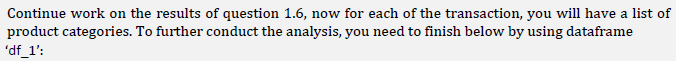

### **Question 1.7.1**

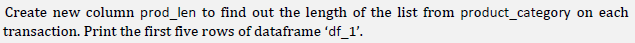

### With Pandas

In [146]:
def count_product_categories(lst):
    return len(lst)


df_1_pd['prod_len'] = df_1_pd['Product_category_updated'].apply(count_product_categories)

df_1_pd.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product_category,productName_process,Product_category_updated,productName_process_updated,prod_len,path
TransactionNo,,,,,,
536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[Cream Hanging Heart TLight Holder, White Moroccan Metal Lantern, Cream Cupid Hearts Coat Hanger, Knitted Union Flag Hot Water Bottle, Red Woolly Hottie White Heart, Set Babushka Nesting Boxes, Glass Star Frosted TLight Holder]",[0ca],"[Cream Hanging Heart TLight Holder, White Moroccan Metal Lantern, Cream Cupid Hearts Coat Hanger, Knitted Union Flag Hot Water Bottle, Red Woolly Hottie White Heart, Set Babushka Nesting Boxes, Glass Star Frosted TLight Holder]",1,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > conversion
536366,"[0ca, 0ca]","[Hand Warmer Union Jack, Hand Warmer Red Retrospot]",[0ca],"[Hand Warmer Union Jack, Hand Warmer Red Retrospot]",1,start > 0ca > 0ca > conversion
536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[Assorted Colour Bird Ornament, Poppys Playhouse Bedroom, Poppys Playhouse Kitchen, Feltcraft Princess Charlotte Doll, Ivory Knitted Mug Cosy, Box Of Assorted Colour Teaspoons, Box Of Vintage Jigsaw Blocks, Home Building Block Word, Love Building Block Word, Recipe Box With Metal Heart, Doormat New England, Box Of Vintage Alphabet Blocks]",[0ca],"[Assorted Colour Bird Ornament, Poppys Playhouse Bedroom, Poppys Playhouse Kitchen, Feltcraft Princess Charlotte Doll, Ivory Knitted Mug Cosy, Box Of Assorted Colour Teaspoons, Box Of Vintage Jigsaw Blocks, Home Building Block Word, Love Building Block Word, Recipe Box With Metal Heart, Doormat New England, Box Of Vintage Alphabet Blocks]",1,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > conversion
536368,"[0ca, 0ca, 0ca, 0ca]","[Jam Making Set With Jars, Red Coat Rack Paris Fashion, Yellow Coat Rack Paris Fashion, Blue Coat Rack Paris Fashion]",[0ca],"[Jam Making Set With Jars, Red Coat Rack Paris Fashion, Yellow Coat Rack Paris Fashion, Blue Coat Rack Paris Fashion]",1,start > 0ca > 0ca > 0ca > 0ca > conversion
536369,[0ca],[Bath Building Block Word],[0ca],[Bath Building Block Word],1,start > 0ca > conversion


### With PySpark

In [77]:
def count_product_categories(lst):
    # Check if the input is a list
    if isinstance(lst, list):
        return len(lst)
    # If not a list return None
    else:
        return None

# Use size function to get the length of the array
df_1 = df_1.withColumn('prod_len', size(col('Product_category_updated')))

df_1.show(5)

+-------------+--------------------+--------------------+------------------------+---------------------------+--------+
|TransactionNo|    Product_category| productName_process|Product_category_updated|productName_process_updated|prod_len|
+-------------+--------------------+--------------------+------------------------+---------------------------+--------+
|       536596|[0ca, 0ca, 0ca, 0...|[Vintage Union Ja...|                   [0ca]|       [Vintage Union Ja...|       1|
|       536938|[0ca, 0ca, 0ca, 0...|[Jumbo Storage Ba...|                   [0ca]|       [Jumbo Storage Ba...|       1|
|       537252|               [0ca]|    [Popcorn Holder]|                   [0ca]|           [Popcorn Holder]|       1|
|       537691|[0ca, 0ca, 0ca, 0...|[TLight Glass Flu...|                   [0ca]|       [TLight Glass Flu...|       1|
|       538184|[0ca, 0ca, 0ca, 0...|[Pack Of Birdy Gi...|                   [0ca]|       [Pack Of Birdy Gi...|       1|
+-------------+--------------------+----

### **Question 1.7.2**

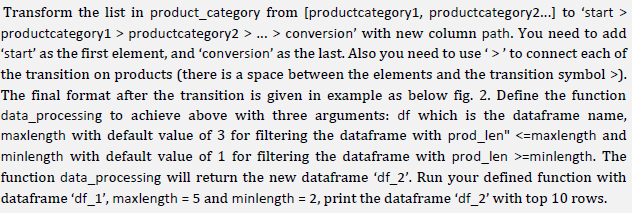

### With Pandas

In [78]:
def transform_path(lst):
        if len(lst) > 0:
            return 'start > ' + ' > '.join(lst) + ' > conversion'
        return 'start > conversion'

 # Apply the transformation to create the 'path' column
df_1_pd['path'] = df_1_pd['Product_category'].apply(transform_path)


In [79]:
df_1_pd.head(10)

,Product_category,productName_process,Product_category_updated,productName_process_updated,prod_len,path
TransactionNo,,,,,,
536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[Cream Hanging Heart TLight Holder, White Moro...",[0ca],"[Cream Hanging Heart TLight Holder, White Moro...",7,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0c...
536366,"[0ca, 0ca]","[Hand Warmer Union Jack, Hand Warmer Red Retro...",[0ca],"[Hand Warmer Union Jack, Hand Warmer Red Retro...",2,start > 0ca > 0ca > conversion
536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Assorted Colour Bird Ornament, Poppys Playhou...",[0ca],"[Assorted Colour Bird Ornament, Poppys Playhou...",12,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0c...
536368,"[0ca, 0ca, 0ca, 0ca]","[Jam Making Set With Jars, Red Coat Rack Paris...",[0ca],"[Jam Making Set With Jars, Red Coat Rack Paris...",4,start > 0ca > 0ca > 0ca > 0ca > conversion
536369,[0ca],[Bath Building Block Word],[0ca],[Bath Building Block Word],1,start > 0ca > conversion
536370,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Alarm Clock Bakelike Pink, Alarm Clock Bakeli...",[0ca],"[Alarm Clock Bakelike Pink, Alarm Clock Bakeli...",19,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0c...
536371,[0ca],[Paper Chain Kit S Christmas],[0ca],[Paper Chain Kit S Christmas],1,start > 0ca > conversion
536372,"[0ca, 0ca]","[Hand Warmer Red Retrospot, Hand Warmer Union ...",[0ca],"[Hand Warmer Red Retrospot, Hand Warmer Union ...",2,start > 0ca > 0ca > conversion
536373,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Cream Hanging Heart TLight Holder, White Moro...",[0ca],"[Cream Hanging Heart TLight Holder, White Moro...",16,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0c...


In [80]:
# Set display option to show full width of columns
pd.set_option('display.max_colwidth', None)

df_1_pd['path'].head(10)

,path
TransactionNo,
536365,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > conversion
536366,start > 0ca > 0ca > conversion
536367,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > conversion
536368,start > 0ca > 0ca > 0ca > 0ca > conversion
536369,start > 0ca > conversion
536370,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > conversion
536371,start > 0ca > conversion
536372,start > 0ca > 0ca > conversion
536373,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > conversion


### With PySpark

In [81]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType


def transform_path(lst):
    if len(lst) > 0:
        return 'start > ' + ' > '.join(lst) + ' > conversion'
    return 'start > conversion'

# Create a UDF (User Defined Function) from the transform_path function
transform_path_udf = udf(transform_path, StringType())

# Apply the UDF to the 'Product_category' column using withColumn
df_1 = df_1.withColumn('path', transform_path_udf(df_1['Product_category']))

In [82]:
df_1.select('path').show(10, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|path                                                                                                                                                                                                                                                                                                                                            |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

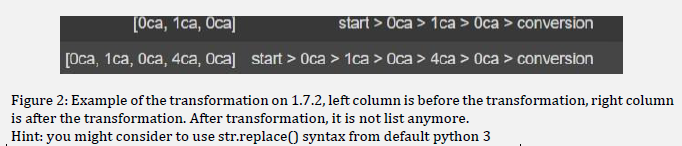

## **Question 1.8**

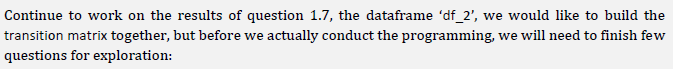

image.png

### **Question 1.8.1**

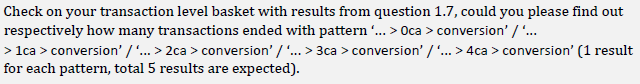

### With Pandas

In [83]:
# Initialize counters for each conversion pattern
count_0ca = 0
count_1ca = 0
count_2ca = 0
count_3ca = 0
count_4ca = 0

# Loop through the 'path' column in df_1 and check each pattern
for path in df_1_pd['path']:
    if path.endswith('0ca > conversion'):
        count_0ca += 1
    elif path.endswith('1ca > conversion'):
        count_1ca += 1
    elif path.endswith('2ca > conversion'):
        count_2ca += 1
    elif path.endswith('3ca > conversion'):
        count_3ca += 1
    elif path.endswith('4ca > conversion'):
        count_4ca += 1

# Output the results for each pattern
count_0ca, count_1ca, count_2ca, count_3ca, count_4ca

(19342, 26, 147, 71, 204)

### With PySpark

In [84]:
# Initialize counters for each conversion pattern
count_0ca = 0
count_1ca = 0
count_2ca = 0
count_3ca = 0
count_4ca = 0

# Convert the 'path' column to a list using collect()
paths = df_1.select('path').collect()


# Iterate through the list of paths
for row in paths:
    path = row['path']  # Access the 'path' value from each row
    if path.endswith('0ca > conversion'):
        count_0ca += 1
    elif path.endswith('1ca > conversion'):
        count_1ca += 1
    elif path.endswith('2ca > conversion'):
        count_2ca += 1
    elif path.endswith('3ca > conversion'):
        count_3ca += 1
    elif path.endswith('4ca > conversion'):
        count_4ca += 1

# Output the results for each pattern
count_0ca, count_1ca, count_2ca, count_3ca, count_4ca

(19342, 26, 147, 71, 204)

### **Question 1.8.2**

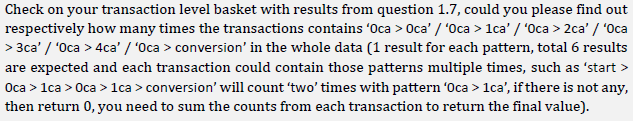

### With Pandas

In [85]:
# Initialize counters for each conversion pattern
count_0ca_conversion = 0
count_0ca_0ca = 0
count_0ca_1ca = 0
count_0ca_2ca = 0
count_0ca_3ca = 0
count_0ca_4ca = 0

for path in df_1_pd['path']:
    # Loop through each path and count the occurrences of each pattern
    count_0ca_0ca += path.count('0ca > 0ca')
    count_0ca_1ca += path.count('0ca > 1ca')
    count_0ca_2ca += path.count('0ca > 2ca')
    count_0ca_3ca += path.count('0ca > 3ca')
    count_0ca_4ca += path.count('0ca > 4ca')
    count_0ca_conversion += path.count('0ca > conversion')

# Output the results for each pattern
count_0ca_0ca,count_0ca_1ca,count_0ca_2ca ,count_0ca_3ca,count_0ca_4ca,count_0ca_conversion

(255374, 1337, 1233, 368, 1299, 19342)

### With PySpark

In [86]:
# Initialize counters for each conversion pattern
count_0ca_conversion = 0
count_0ca_0ca = 0
count_0ca_1ca = 0
count_0ca_2ca = 0
count_0ca_3ca = 0
count_0ca_4ca = 0

# Convert the 'path' column to a list using collect() or toPandas()
# Using collect() to retrieve the data as a list of rows.
for row in df_1.select('path').collect():
    path = row['path'] # Access the 'path' value from the row
    # Loop through each path and count the occurrences of each pattern
    count_0ca_0ca += path.count('0ca > 0ca')
    count_0ca_1ca += path.count('0ca > 1ca')
    count_0ca_2ca += path.count('0ca > 2ca')
    count_0ca_3ca += path.count('0ca > 3ca')
    count_0ca_4ca += path.count('0ca > 4ca')
    count_0ca_conversion += path.count('0ca > conversion')

# Output the results for each pattern
count_0ca_0ca,count_0ca_1ca,count_0ca_2ca ,count_0ca_3ca,count_0ca_4ca,count_0ca_conversion

(255374, 1337, 1233, 368, 1299, 19342)

### **Question 1.8.3**

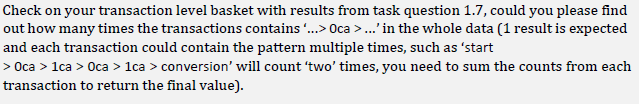

### With Pandas

In [87]:
count_0ca_pattern = 0

# Loop through each path and count how many times '> 0ca >' appears
for path in df_1_pd['path']:
    count_0ca_pattern += path.count('> 0ca >')

# Output the total count of the pattern
count_0ca_pattern

267912

### With PySpark

In [88]:
from pyspark.sql.functions import col, sum, expr

# Create a new column that counts the occurrences of the pattern in each path
df_1 = df_1.withColumn("pattern_count", expr("size(split(path, '> 0ca >')) - 1"))

# Calculate the total count of the pattern across all transactions
count_0ca_pattern_1 = df_1.select(sum("pattern_count")).collect()[0][0]

# Output the total count
count_0ca_pattern_1

267912

### **Question 1.8.4**

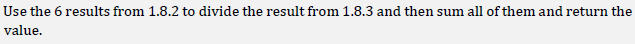

In [89]:
# Prevent division by zero
if count_0ca_pattern == 0:
    final_value = 0
else:
    # Divide each result from 1.8.2 by the result from 1.8.3
    div_0ca_0ca = count_0ca_0ca / count_0ca_pattern
    div_0ca_1ca = count_0ca_1ca / count_0ca_pattern
    div_0ca_2ca = count_0ca_2ca / count_0ca_pattern
    div_0ca_3ca = count_0ca_3ca / count_0ca_pattern
    div_0ca_4ca = count_0ca_4ca / count_0ca_pattern
    div_0ca_conversion = count_0ca_conversion / count_0ca_pattern

    # Sum all the divided values
    final_value = div_0ca_0ca + div_0ca_1ca + div_0ca_2ca + div_0ca_3ca + div_0ca_4ca + div_0ca_conversion

# Output the final value
final_value

1.0412112932604736

In [90]:
import re

# Initialize counters for each conversion pattern
count_0ca_conversion = 0
count_0ca_0ca = 0
count_0ca_1ca = 0
count_0ca_2ca = 0
count_0ca_3ca = 0
count_0ca_4ca = 0

# Define a regular expression pattern to capture pairs of '0ca > 0ca'
pattern_0ca_0ca = r'(?:(?:> 0ca > 0ca)(?: > 0ca)*)'

# Loop through each path and count the occurrences of each pattern
for path in df_1_pd['path']:
    # For '0ca > 0ca', we count the pairs
    matches_0ca_0ca = re.findall(pattern_0ca_0ca, path)
    count_0ca_0ca += len(matches_0ca_0ca)

    # For other patterns, use the original count method
    count_0ca_1ca += path.count('0ca > 1ca')
    count_0ca_2ca += path.count('0ca > 2ca')
    count_0ca_3ca += path.count('0ca > 3ca')
    count_0ca_4ca += path.count('0ca > 4ca')
    count_0ca_conversion += path.count('0ca > conversion')

# Output the results for each pattern
count_0ca_0ca, count_0ca_1ca, count_0ca_2ca, count_0ca_3ca, count_0ca_4ca, count_0ca_conversion

(21467, 1337, 1233, 368, 1299, 19342)

## **Question 1.9**

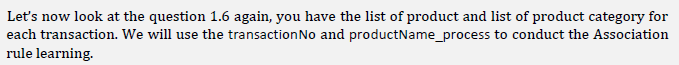

### **Question 1.9.1**

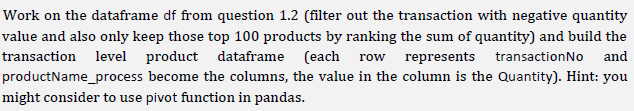

In [91]:
df_pd.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Product_category',
       'Price', 'Quantity', 'CustomerNo', 'Country', 'productName_process',
       'revenue', 'transaction_date', 'day_of_week', 'month'],
      dtype='object')

In [92]:
 #Step 1: Filter out transactions with negative quantity
df_filtered = df_pd[df_pd['Quantity'] > 0]

# Step 2: Find the top 100 products by ranking the sum of quantity
top_100_products = (df_filtered.groupby('productName_process')['Quantity']
                    .sum()  # Sum the quantity for each product
                    .nlargest(100)  # Get the top 100 products
                    .index)  # Get the product names

# Step 3: Filter the dataframe to keep only transactions involving the top 100 products
df_top100 = df_filtered[df_filtered['productName_process'].isin(top_100_products)]

# Step 4: Create the pivot table for transaction level product dataframe
df_top100_pivot = df_top100.pivot_table(index='TransactionNo',
                                        columns='productName_process',
                                        values='Quantity',
                                        aggfunc='sum',  # Sum the quantities if multiple products in one transaction
                                        fill_value=0)  # Fill missing values with 0

# Step 5: Display the resulting pivot table (first few rows)
df_top100_pivot.head()

productName_process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,Aged Glass Silver TLight Holder,Antique Silver TLight Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Assorted Flower Colour Leis,Asstd Design d Paper Stickers,...,Spaceboy Lunch Box,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging TLight,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,24,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df_pd_top100 = df_pd[df_pd['productName_process'].isin(top_100_products)]

In [94]:
df_pd_top100.head(10)

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,revenue,transaction_date,day_of_week,month
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,0ca,10.65,24,13069,United Kingdom,Bag g Swirly Marbles,255.600006,2019-12-09,Monday,December
25,581476,12/9/2019,23166,Medium Ceramic Top Storage Jar,0ca,11.32,48,12433,Norway,Medium Ceramic Top Storage Jar,543.359985,2019-12-09,Monday,December
30,581476,12/9/2019,22998,Travel Card Wallet Keep Calm,0ca,10.68,72,12433,Norway,Travel Card Wallet Keep Calm,768.960022,2019-12-09,Monday,December
38,581476,12/9/2019,22693,Grow A Flytrap Or Sunflower In Tin,0ca,11.34,192,12433,Norway,Grow A Flytrap Or Sunflower In Tin,2177.280029,2019-12-09,Monday,December
45,581476,12/9/2019,22197,Popcorn Holder,0ca,10.99,100,12433,Norway,Popcorn Holder,1099.000000,2019-12-09,Monday,December
57,581476,12/9/2019,21181,Please One Person Metal Sign,0ca,12.15,48,12433,Norway,Please One Person Metal Sign,583.200012,2019-12-09,Monday,December
58,581476,12/9/2019,21175,Gin And Tonic Diet Metal Sign,0ca,12.38,48,12433,Norway,Gin And Tonic Diet Metal Sign,594.239990,2019-12-09,Monday,December
65,581476,12/9/2019,16014,Small Chinese Style Scissor,0ca,10.68,60,12433,Norway,Small Chinese Style Scissor,640.799988,2019-12-09,Monday,December
91,581477,12/9/2019,22457,Natural Slate Heart Chalkboard,0ca,13.27,6,13426,United Kingdom,Natural Slate Heart Chalkboard,79.620003,2019-12-09,Monday,December
92,581477,12/9/2019,22469,Heart Of Wicker Small,0ca,11.94,12,13426,United Kingdom,Heart Of Wicker Small,143.279999,2019-12-09,Monday,December


In [95]:
transaction_product_df = df_top100.pivot_table(index='TransactionNo', columns='productName_process',
                                                  values='Quantity', fill_value=0)

In [96]:
transaction_product_df.head(10)

productName_process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,Aged Glass Silver TLight Holder,Antique Silver TLight Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Assorted Flower Colour Leis,Asstd Design d Paper Stickers,...,Spaceboy Lunch Box,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging TLight,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536378,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Question 1.9.2**

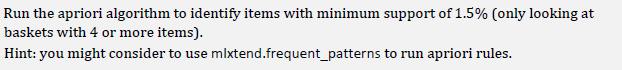

In [97]:
pip install mlxtend

In [98]:
from mlxtend.frequent_patterns import apriori, association_rules

In [99]:
df_filtered_basket = transaction_product_df[transaction_product_df.gt(0).sum(axis=1) >= 4]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
df_filtered_basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


productName_process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,Aged Glass Silver TLight Holder,Antique Silver TLight Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Assorted Flower Colour Leis,Asstd Design d Paper Stickers,...,Spaceboy Lunch Box,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging TLight,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536378,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0
581498,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,13.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
581538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# Step2:  Convert quantities to binary (1 if quantity > 0, else 0)
df_filtered_basket = (df_filtered_basket > 0).astype(int)

# Step 3: Now run the Apriori algorithm on the binary DataFrame
frequent_itemsets = apriori(df_filtered_basket, min_support=0.015, use_colnames=True)

# Step 4: Display the resulting frequent itemsets
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.070687,( Cake Cases Vintage Christmas)
1,0.101823,( Ribbons Rustic Charm)
2,0.079383,( Sweetheart Fairy Cake Cases)
3,0.105470,( Teatime Fairy Cake Cases)
4,0.031276,(Aged Glass Silver TLight Holder)
...,...,...
4367,0.015989,"(Strawberry Charlotte Bag, Red Retrospot Charlotte Bag, Regency Cakestand Tier, Charlotte Bag Suki Design, Charlotte Bag Pink Polkadot, Woodland Charlotte Bag)"
4368,0.015147,"(Lunch Bag Spaceboy Design, Lunch Bag Suki Design, Lunch Bag Red Retrospot, Lunch Bag Cars Blue, Lunch Bag Pink Polkadot, Lunch Bag Black Skull)"
4369,0.015428,"(Lunch Bag Suki Design, Lunch Bag Red Retrospot, Lunch Bag Cars Blue, Lunch Bag Pink Polkadot, Lunch Bag Woodland, Lunch Bag Black Skull)"
4370,0.015288,"(Lunch Bag Suki Design, Lunch Bag Spaceboy Design, Lunch Bag Red Retrospot, Lunch Bag Cars Blue, Lunch Bag Woodland, Lunch Bag Black Skull)"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Question 1.9.3**

image.png

In [102]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Filter relevant transactions/items first (optimize data size)
# Reduce the dataset by focusing on items/transactions with reasonable frequency
df_filtered_basket = df_filtered_basket[df_filtered_basket.sum(axis=1) > 0]

# Step 2: Run Apriori algorithm with a higher minimum support threshold initially
# Start with a higher threshold to reduce the number of frequent itemsets
frequent_itemsets = apriori(df_filtered_basket, min_support=0.02, use_colnames=True)

# If memory allows, reduce the threshold incrementally
if frequent_itemsets.empty:
    frequent_itemsets = apriori(df_filtered_basket, min_support=0.01, use_colnames=True)

# Step 3: Generate the association rules with lift and support metrics
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 4: Filter rules for those with lift > 10
filtered_rules = rules[rules['lift'] > 10]

# Display or save the results
filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1888,(Wooden Star Christmas Scandinavian),(Wooden Heart Christmas Scandinavian),0.053296,0.054979,0.042637,0.800000,14.551020,0.039707,4.725105,0.983704
1889,(Wooden Heart Christmas Scandinavian),(Wooden Star Christmas Scandinavian),0.054979,0.053296,0.042637,0.775510,14.551020,0.039707,4.217136,0.985456
5794,"(Charlotte Bag Suki Design, Strawberry Charlotte Bag)","(Charlotte Bag Pink Polkadot, Lunch Bag Cars Blue)",0.057363,0.035063,0.020898,0.364303,10.389927,0.018886,1.517920,0.958750
5796,"(Charlotte Bag Suki Design, Lunch Bag Cars Blue)","(Strawberry Charlotte Bag, Charlotte Bag Pink Polkadot)",0.038149,0.052314,0.020898,0.547794,10.471239,0.018902,2.095696,0.940374
5797,"(Strawberry Charlotte Bag, Charlotte Bag Pink Polkadot)","(Charlotte Bag Suki Design, Lunch Bag Cars Blue)",0.052314,0.038149,0.020898,0.399464,10.471239,0.018902,1.601654,0.954431
...,...,...,...,...,...,...,...,...,...,...
8349,"(Charlotte Bag Suki Design, Red Retrospot Charlotte Bag)","(Strawberry Charlotte Bag, Lunch Bag Black Skull, Woodland Charlotte Bag)",0.070407,0.026788,0.020056,0.284861,10.633800,0.018170,1.360870,0.974577
8351,"(Red Retrospot Charlotte Bag, Woodland Charlotte Bag)","(Charlotte Bag Suki Design, Strawberry Charlotte Bag, Lunch Bag Black Skull)",0.069004,0.027349,0.020056,0.290650,10.627371,0.018169,1.371187,0.973048
8352,"(Charlotte Bag Suki Design, Lunch Bag Black Skull)","(Strawberry Charlotte Bag, Red Retrospot Charlotte Bag, Woodland Charlotte Bag)",0.042777,0.045722,0.020056,0.468852,10.254350,0.018100,1.796634,0.942811
8353,"(Charlotte Bag Suki Design, Woodland Charlotte Bag)","(Strawberry Charlotte Bag, Red Retrospot Charlotte Bag, Lunch Bag Black Skull)",0.062693,0.031557,0.020056,0.319911,10.137609,0.018078,1.423994,0.961646


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Question 1.9.4**

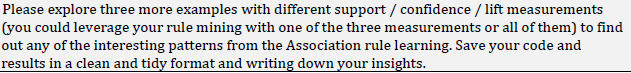

In [103]:
# Example 1: Using Support
# Calculate frequent itemsets with a minimum support of 0.2
frequent_itemsets1 = apriori(df_filtered_basket, min_support=0.2, use_colnames=True)
rules1 = association_rules(frequent_itemsets1, metric="support", min_threshold=0.2)
filtered_rules1 = rules[rules['support'] > 0.2]

print("Example 1 - Rules based on Support:")
print(rules1[['antecedents', 'consequents', 'support']])

# Example 2: Using Confidence
# Calculate frequent itemsets with a minimum support of 0.2
frequent_itemsets2 = apriori(df_filtered_basket, min_support=0.2, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.4)

print("\nExample 2 - Rules based on Confidence:")
print(rules2[['antecedents', 'consequents', 'confidence']])

# Example 3: Using Lift
# Calculate frequent itemsets with a minimum support of 0.2
frequent_itemsets3 = apriori(df_filtered_basket, min_support=0.2, use_colnames=True)
rules3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1.2)
print("\nExample 3 - Rules based on Lift:")
print(rules3[['antecedents', 'consequents', 'lift']])



Example 1 - Rules based on Support:
Empty DataFrame
Columns: [antecedents, consequents, support]
Index: []

Example 2 - Rules based on Confidence:
Empty DataFrame
Columns: [antecedents, consequents, confidence]
Index: []

Example 3 - Rules based on Lift:
Empty DataFrame
Columns: [antecedents, consequents, lift]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py

In [104]:
# Save results to a CSV file
combined_results = pd.concat([rules1[['antecedents', 'consequents', 'support']],
                               rules2[['antecedents', 'consequents', 'confidence']],
                               rules3[['antecedents', 'consequents', 'lift']]],
                              keys=['Support', 'Confidence', 'Lift']).reset_index(level=0).rename(columns={'level_0': 'Metric'})
combined_results.to_csv('association_rules_results.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
combined_results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Metric,antecedents,consequents,support,confidence,lift


In [106]:
# Example 1: Using Support
frequent_itemsets1 = apriori(df_filtered_basket, min_support=0.05, use_colnames=True)
rules1 = association_rules(frequent_itemsets1, metric="support", min_threshold=0.05)
print("\nExample 1 - Rules based on Support:")
print(rules1[['antecedents', 'consequents', 'support']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Example 1 - Rules based on Support:
                                          antecedents  \
0                         ( Teatime Fairy Cake Cases)   
1                      (Pack Of Retrospot Cake Cases)   
2                         (Charlotte Bag Suki Design)   
3                       (Charlotte Bag Pink Polkadot)   
4                       (Charlotte Bag Pink Polkadot)   
..                                                ...   
213  (Lunch Bag Red Retrospot, Lunch Bag Black Skull)   
214    (Lunch Bag Suki Design, Lunch Bag Black Skull)   
215                         (Lunch Bag Red Retrospot)   
216                           (Lunch Bag Suki Design)   
217                           (Lunch Bag Black Skull)   

                                          consequents   support  
0                      (Pack Of Retrospot Cake Cases)  0.061571  
1                         ( Teatime Fairy Cake Cases)  0.061571  
2                       (Charlotte Bag Pink Polkadot)  0.056381  
3             

In [107]:
# Example 2: Using Confidence
frequent_itemsets2 = apriori(df_filtered_basket, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.8)
print("\nExample 2 - Rules based on Confidence:")
print(rules2[['antecedents', 'consequents', 'confidence']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Example 2 - Rules based on Confidence:
                                                    antecedents  \
0  (Jumbo Shopper Vintage Red Paisley, Jumbo Bag Pink Polkadot)   
1             (Jumbo Storage Bag Suki, Jumbo Bag Pink Polkadot)   

                 consequents  confidence  
0  (Jumbo Bag Red Retrospot)    0.812903  
1  (Jumbo Bag Red Retrospot)    0.803119  


In [108]:
# Example 3: Using Lift
frequent_itemsets3 = apriori(df_filtered_basket, min_support=0.05, use_colnames=True)
rules3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1.2)
print("\nExample 3 - Rules based on Lift:")
print(rules3[['antecedents', 'consequents', 'lift']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Example 3 - Rules based on Lift:
                                          antecedents  \
0                         ( Teatime Fairy Cake Cases)   
1                      (Pack Of Retrospot Cake Cases)   
2                         (Charlotte Bag Suki Design)   
3                       (Charlotte Bag Pink Polkadot)   
4                       (Charlotte Bag Pink Polkadot)   
..                                                ...   
211  (Lunch Bag Red Retrospot, Lunch Bag Black Skull)   
212    (Lunch Bag Suki Design, Lunch Bag Black Skull)   
213                         (Lunch Bag Red Retrospot)   
214                           (Lunch Bag Suki Design)   
215                           (Lunch Bag Black Skull)   

                                          consequents      lift  
0                      (Pack Of Retrospot Cake Cases)  3.613131  
1                         ( Teatime Fairy Cake Cases)  3.613131  
2                       (Charlotte Bag Pink Polkadot)  5.067645  
3                

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Question 1.10**

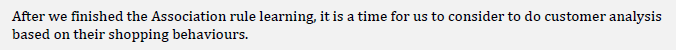

### **Question 1.10.1**

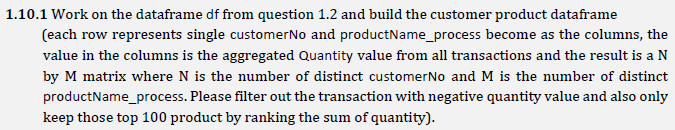

In [109]:
df_top100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,revenue,transaction_date,day_of_week,month
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,0ca,10.65,24,13069,United Kingdom,Bag g Swirly Marbles,255.600006,2019-12-09,Monday,December
25,581476,12/9/2019,23166,Medium Ceramic Top Storage Jar,0ca,11.32,48,12433,Norway,Medium Ceramic Top Storage Jar,543.359985,2019-12-09,Monday,December
30,581476,12/9/2019,22998,Travel Card Wallet Keep Calm,0ca,10.68,72,12433,Norway,Travel Card Wallet Keep Calm,768.960022,2019-12-09,Monday,December
38,581476,12/9/2019,22693,Grow A Flytrap Or Sunflower In Tin,0ca,11.34,192,12433,Norway,Grow A Flytrap Or Sunflower In Tin,2177.280029,2019-12-09,Monday,December
45,581476,12/9/2019,22197,Popcorn Holder,0ca,10.99,100,12433,Norway,Popcorn Holder,1099.000000,2019-12-09,Monday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536229,536544,12/1/2018,22423,Regency Cakestand 3 Tier,0ca,23.29,40,17544,United Kingdom,Regency Cakestand Tier,931.599976,2018-12-01,Saturday,December
536238,536592,12/1/2018,22423,Regency Cakestand 3 Tier,0ca,23.29,47,16592,United Kingdom,Regency Cakestand Tier,1094.630005,2018-12-01,Saturday,December
536276,536477,12/1/2018,22423,Regency Cakestand 3 Tier,0ca,21.47,16,16210,United Kingdom,Regency Cakestand Tier,343.519989,2018-12-01,Saturday,December
536281,536544,12/1/2018,79321,Chilli Lights,0ca,20.67,1,17544,United Kingdom,Chilli Lights,20.670000,2018-12-01,Saturday,December


In [110]:
# Step 1: Group by customerNo and productName_process, and sum the Quantity
df_grouped = df_top100.groupby(['CustomerNo', 'productName_process'])['Quantity'].sum().reset_index()

# Step 2: Pivot the DataFrame so that customerNo is the index, productName_process are columns
df_customer_product_matrix = df_grouped.pivot(index='CustomerNo', columns='productName_process', values='Quantity')

# Step 3: Replace NaN values with 0
df_customer_product_matrix = df_customer_product_matrix.fillna(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
df_customer_product_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


productName_process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,Aged Glass Silver TLight Holder,Antique Silver TLight Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Assorted Flower Colour Leis,Asstd Design d Paper Stickers,...,Spaceboy Lunch Box,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging TLight,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs
CustomerNo,,,,,,,,,,,,,,,,,,,,,
12004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12008,0.0,1.0,0.0,0.0,1.0,40.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0
12025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12026,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0
18281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Question 1.10.2**

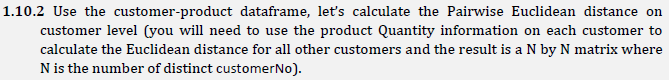

In [112]:
from scipy.spatial.distance import pdist, squareform

# Step 1: Calculate pairwise Euclidean distances between customers
# pdist computes pairwise distances between rows of a matrix
distances = pdist(df_customer_product_matrix.values, metric='euclidean')

# Step 2: Convert the condensed distance matrix to a square matrix (N x N)
distance_matrix = squareform(distances)

# Step 3: Create a DataFrame for better readability (optional)
customer_no_list = df_customer_product_matrix.index  # List of customerNo
distance_df = pd.DataFrame(distance_matrix, index=customer_no_list, columns=customer_no_list)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
distance_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerNo,12004,12008,12025,12026,12031,12042,12043,12050,12057,12063,...,18269,18270,18272,18274,18276,18277,18281,18282,18283,18287
CustomerNo,,,,,,,,,,,,,,,,,,,,,
12004,0.000000,42.130749,13.152946,10.049876,9.949874,22.068076,19.416488,8.426150,33.852622,8.774964,...,22.516660,14.798649,136.216739,20.000000,48.445846,28.548205,13.228757,14.000000,99.005050,42.649736
12008,42.130749,0.000000,43.474130,41.737274,42.308392,46.130250,44.384682,41.737274,53.656314,42.000000,...,47.853944,43.657760,139.807010,45.683695,45.978256,50.019996,43.150898,43.116122,107.791465,59.816386
12025,13.152946,43.474130,0.000000,15.231546,9.899495,24.859606,19.390719,13.266499,32.326460,14.142136,...,27.820855,18.493242,137.542721,22.869193,49.699095,30.626786,17.262677,17.860571,97.483332,45.144213
12026,10.049876,41.737274,15.231546,0.000000,9.695360,20.542639,21.954498,6.782330,37.080992,6.000000,...,24.698178,13.341664,135.535973,18.947295,48.020829,27.820855,11.575837,12.449900,99.413279,43.011626
12031,9.949874,42.308392,9.899495,9.695360,0.000000,22.181073,20.248457,7.211103,33.985291,7.874008,...,25.219040,14.282857,137.040140,19.621417,48.290786,28.284271,12.649111,13.453624,99.191734,43.588989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277,28.548205,50.019996,30.626786,27.820855,28.284271,34.351128,34.496377,27.422618,46.076024,27.239677,...,36.276714,29.732137,139.499104,32.634338,54.881691,0.000000,28.982753,29.342802,100.930669,50.793700
18281,13.228757,43.150898,17.262677,11.575837,12.649111,23.237900,23.452079,10.583005,38.509739,10.099505,...,26.000000,15.620499,137.186005,20.615528,48.703183,28.982753,0.000000,14.866069,98.949482,44.045431
18282,14.000000,43.116122,17.860571,12.449900,13.453624,23.086793,23.895606,11.532563,38.470768,11.090537,...,26.400758,16.278821,137.262522,10.862780,48.918299,29.342802,14.866069,0.000000,100.757134,44.283180


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Question 1.10.3**

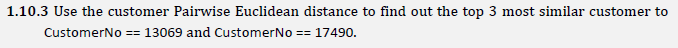

In [114]:
# Step 1: Get the distances for CustomerNo 13069
distances_13069 = distance_df.loc[13069].sort_values()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
distances_13069

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,13069
CustomerNo,
13069,0.000000
15118,598.369451
17523,1449.092820
18179,1734.755891
17954,1734.821605
...,...
17949,11948.402697
13256,12702.052039
16333,13541.709124


In [116]:
# Step 2: Get the top 3 most similar customers for CustomerNo 13069 (excluding itself)
top_3_similar_to_13069 = distances_13069[distances_13069 > 0].nsmallest(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
# Step 3: print the top3 similar to 13069
top_3_similar_to_13069

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,13069
CustomerNo,
15118,598.369451
17523,1449.092820
18179,1734.755891


In [118]:
# Step 4: Get the distances for CustomerNo 17490
distances_17490 = distance_df.loc[17490].sort_values()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
# Step 5: Get the top 3 most similar customers for CustomerNo 17490 (excluding itself)
top_3_similar_to_17490 = distances_17490[distances_17490 > 0].nsmallest(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
top_3_similar_to_17490

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,17490
CustomerNo,
12582,26.00000
12519,26.00000
12652,26.70206


### **Question 1.10.4**

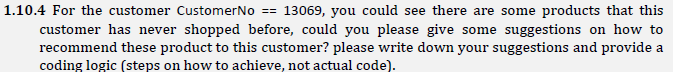

In [121]:
similar_customer_ids=[13069,15118,17523,18179]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
similar_customer_products = df_customer_product_matrix.loc[similar_customer_ids]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
similar_customer_products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


productName_process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,Aged Glass Silver TLight Holder,Antique Silver TLight Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Assorted Flower Colour Leis,Asstd Design d Paper Stickers,...,Spaceboy Lunch Box,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging TLight,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs
CustomerNo,,,,,,,,,,,,,,,,,,,,,
13069,12.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,30.0,0.0,20.0,20.0,0.0,0.0
15118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18179,24.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Part II**

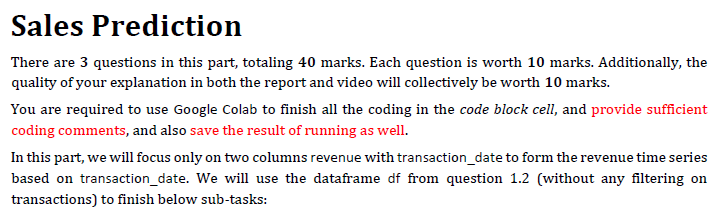

## **Question 2.1**

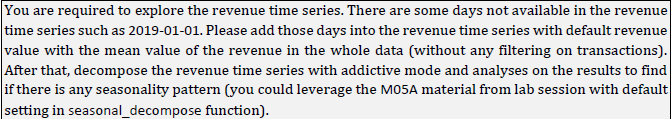

In [124]:
df_rev = df_pd[['transaction_date', 'revenue']].set_index('transaction_date')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
df_rev.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,revenue
transaction_date,
2019-12-09,257.640015
2019-12-09,383.399994
2019-12-09,138.360001
2019-12-09,127.800003
2019-12-09,71.639999


In [126]:
df_rev_agg=df_rev.groupby('transaction_date').sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
df_rev_agg.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,revenue
transaction_date,
2018-12-01,324649.218750
2018-12-02,260301.656250
2018-12-03,201975.187500
2018-12-05,196630.796875
2018-12-06,270656.875000


In [128]:
 #Step 1: Generate a complete date range based on the min and max dates in the DataFrame
full_date_range = pd.date_range(start=df_rev_agg.index.min(), end=df_rev_agg.index.max(), freq='D')

# Step 2: Reindex the DataFrame to the full date range
df_rev_reindexed = df_rev_agg.reindex(full_date_range)

# Step 3: Identify missing values (NaNs in the revenue column)
missing_values = df_rev_reindexed[df_rev_reindexed['revenue'].isna()]

# The result will show missing dates
print(missing_values)

            revenue
2018-12-04      NaN
2018-12-11      NaN
2018-12-18      NaN
2018-12-24      NaN
2018-12-25      NaN
...             ...
2019-11-05      NaN
2019-11-12      NaN
2019-11-19      NaN
2019-11-26      NaN
2019-12-03      NaN

[69 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
mean_revenue = df_rev_reindexed['revenue'].mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
# Step 3: Fill the missing values with the mean revenue
df_rev_final = df_rev_reindexed.fillna(mean_revenue)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [131]:
df_rev_final

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,revenue
2018-12-01,324649.218750
2018-12-02,260301.656250
2018-12-03,201975.187500
2018-12-04,197639.437500
2018-12-05,196630.796875
...,...
2019-12-05,288295.468750
2019-12-06,190335.343750
2019-12-07,263611.250000
2019-12-08,215952.781250


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

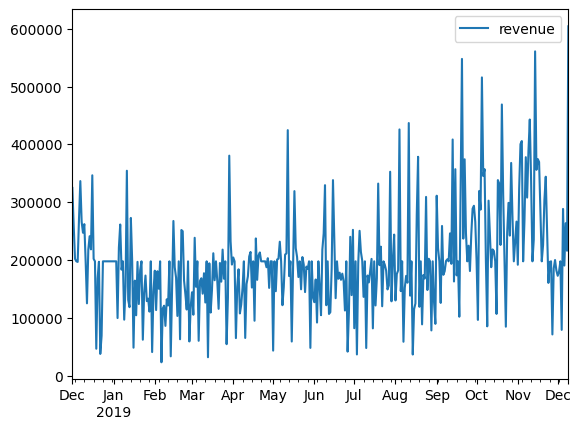

In [132]:
df_rev_final.plot()

In [133]:
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
df_rev_decompose=seasonal_decompose(df_rev_final,model='additive', period=24)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


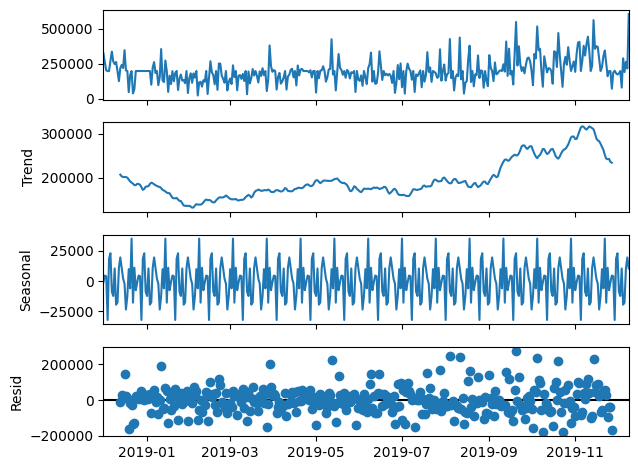

In [135]:
df_rev_decompose.plot()
plt.show()

## **Question 2.2**

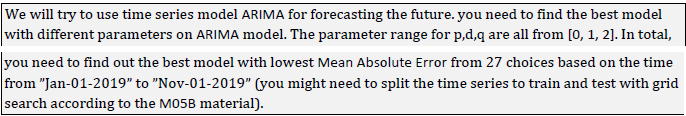

In [136]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [137]:
p=range(0,3)
d=range(0,3)
q=range(0,3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
import itertools
pdq=list(itertools.product(p,d,q))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
pdq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

split the model in the test and train

In [140]:
df_rev_final['date']=df_rev_final.index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Stationarity check for the data

In [141]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df_rev_final['revenue'])
dftest
print('DF test statistic is %3.3f'%dftest[0])
print('DF test p-value is %1.4f' % dftest[1])


DF test statistic is -2.313
DF test p-value is 0.1677


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Null Hypothesis (H0): The time series has a unit root, meaning it is non-stationary.
Alternative Hypothesis (H1): The time series is stationary.

 p-value is greater than the 5% level,  fail to reject the null hypothesis, implying the series is non-stationary.

In [142]:
df_log=df_rev_final.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
df_log['revenue']=np.log(df_rev_final['revenue'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [144]:
train= df_log[(df_log.index >= '2019-01-01') & (df_log.index <= '2019-11-01')]
test=df_log[(df_log.index > '2019-11-01')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Building ARIMA Model with Best pdq

In [145]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
MAE=[]
# Loop through each parameter set in pdq
for param in pdq:
    # Fit the ARIMA model on the training data with the current parameter set
    ARIMA_model = ARIMA(train['revenue'], order=param).fit()

    # Initialize a list to store predictions for the current parameter set
    predictions = []

    # Forecast for each step in the test data
    for t in range(len(test)):
        output = ARIMA_model.forecast(steps=1)  # Forecast the next step
        yhat = output.iloc[0]  # Get the predicted value using .iloc
        predictions.append(yhat)  # Store the prediction

    # Ensure that predictions match the test length
    #assert len(predictions) == len(test['revenue']), "Length mismatch between predictions and test set"

    # Calculate the Mean Absolute Error for the current parameter set
    mea = mean_absolute_error(test['revenue'], predictions)
    MAE.append(mea)

    # Print the MAE for the current parameter set
    print('ARIMA{} - Test MAE: {:.3f}'.format(param, mea))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ARIMA(0, 0, 0) - Test MAE: 0.496
ARIMA(0, 0, 1) - Test MAE: 0.492
ARIMA(0, 0, 2) - Test MAE: 0.447
ARIMA(0, 1, 0) - Test MAE: 0.401
ARIMA(0, 1, 1) - Test MAE: 0.355
ARIMA(0, 1, 2) - Test MAE: 0.352
ARIMA(0, 2, 0) - Test MAE: 0.672


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 1) - Test MAE: 0.401
ARIMA(0, 2, 2) - Test MAE: 0.352
ARIMA(1, 0, 0) - Test MAE: 0.491
ARIMA(1, 0, 1) - Test MAE: 0.360
ARIMA(1, 0, 2) - Test MAE: 0.444
ARIMA(1, 1, 0) - Test MAE: 0.356
ARIMA(1, 1, 1) - Test MAE: 0.352


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - Test MAE: 0.352
ARIMA(1, 2, 0) - Test MAE: 0.401
ARIMA(1, 2, 1) - Test MAE: 0.356


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 2) - Test MAE: 0.350
ARIMA(2, 0, 0) - Test MAE: 0.443
ARIMA(2, 0, 1) - Test MAE: 0.442
ARIMA(2, 0, 2) - Test MAE: 0.361
ARIMA(2, 1, 0) - Test MAE: 0.354
ARIMA(2, 1, 1) - Test MAE: 0.352


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 2) - Test MAE: 0.352
ARIMA(2, 2, 0) - Test MAE: 0.356
ARIMA(2, 2, 1) - Test MAE: 0.354


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 2, 2) - Test MAE: 0.353


The Lowet MAE os 0.350  and pdq value for that is (1,2,2)

## **Question 2.3**

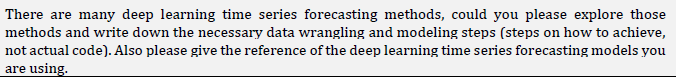

Below is a detailed exploration of various deep learning methods for time series forecasting, along with necessary data wrangling and modeling steps.

Deep Learning Methods for Time Series Forecasting
1. Recurrent Neural Networks (RNNs):
RNNs are a class of neural networks specifically designed for sequential data, making them suitable for time series forecasting.
2. Convolutional Neural Networks (CNNs):
Though primarily used in image processing, CNNs can also be applied to time series data, especially when extracting features from sequences.
3. Transformer Models:
Transformers, originally designed for natural language processing, can also be adapted for time series forecasting, leveraging self-attention mechanisms to capture dependencies across time steps.




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
